# 📌 Import Necessary Libraries

In this section, we import the essential libraries required for handling files, preprocessing images, and working with TensorFlow.

## 🔹 Importing OS and Shutil
- `os`: Provides functions to interact with the operating system, such as file path handling.
- `shutil`: Used for high-level file operations like copying and moving files.
- `random`: Helps in randomly selecting data for splitting or augmentation.


In [25]:
import os
import shutil
import random

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import logging
tf.get_logger().setLevel(logging.ERROR)  

# 📂 Counting Images in Dataset

In this section, we count the total number of images in the dataset, including the training and test sets.

## 🔹 Define Dataset Directories
We specify the paths to the dataset folders:
- `train_dir`: Path to the training dataset (`../dataset/train`).
- `test_dir`: Path to the test dataset (`../dataset/test`).
- `data_dir`: Path to the entire dataset (`../dataset/`).

In [34]:
train_dir = "../dataset/train/"

# Đếm tổng số ảnh trong tất cả các lớp
total_train_images = sum(len(files) for _, _, files in os.walk(train_dir))


test_dir = "../dataset/test/"

# Đếm tổng số ảnh trong tất cả các lớp
total_test_images = sum(len(files) for _, _, files in os.walk(test_dir))

data_dir = "../dataset/"

# Đếm tổng số ảnh trong tất cả các lớp
total_data_images = sum(len(files) for _, _, files in os.walk(data_dir))

print(f"📊 Total images in the dataset: {total_data_images}")  
print(f"📊 Total images in the training set: {total_train_images}")  
print(f"📊 Total images in the test set: {total_test_images}")  


📊 Total images in the dataset: 6899
📊 Total images in the training set: 5516
📊 Total images in the test set: 1383


# 📂 Data Preparation for Training

This section prepares the dataset for training using `ImageDataGenerator` in TensorFlow. The dataset is split into **training** and **validation** sets.

## 🔹 Define Dataset Path
The dataset is stored in the `dataset/train` directory.



In [36]:
# Chuẩn bị dữ liệu với ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Resize ảnh về kích thước chuẩn
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 4416 images belonging to 8 classes.
Found 1100 images belonging to 8 classes.


# 🏗️ Building a CNN Model for Image Classification

In this section, we build a **Convolutional Neural Network (CNN)** using TensorFlow/Keras to classify images into different categories.

## 🔹 Model Architecture
The model consists of multiple **convolutional layers** followed by **max pooling layers**, ending with **fully connected dense layers** for classification.

### 🧱 Layers Used:
1. **Conv2D (32 filters, 3×3 kernel, ReLU activation)** – Extracts features from images.
2. **MaxPooling2D (2×2)** – Reduces spatial dimensions to improve efficiency.
3. **Conv2D (64 filters, 3×3 kernel, ReLU activation)** – Learns more complex patterns.
4. **MaxPooling2D (2×2)** – Further downsamples feature maps.
5. **Conv2D (128 filters, 3×3 kernel, ReLU activation)** – Detects high-level features.
6. **MaxPooling2D (2×2)** – Prevents overfitting and reduces computations.
7. **Flatten Layer** – Converts 2D feature maps into 1D vector.
8. **Dense Layer (512 neurons, ReLU activation)** – Fully connected layer for feature learning.
9. **Output Layer (Softmax activation)** – Classifies into `len(train_generator.class_indices)` categories.


In [5]:
# Xây dựng mô hình CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')  # Số lớp tương ứng với số danh mục
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

# 🚀 Model Compilation and Training

Now that we've built our **CNN model**, we need to **compile** and **train** it using our prepared dataset.

## 🔹 Model Compilation
Before training, we need to configure the **optimizer**, **loss function**, and **evaluation metrics**:
- **Optimizer: Adam** – Adaptive learning rate optimization algorithm.
- **Loss Function: Categorical Crossentropy** – Suitable for multi-class classification.
- **Metric: Accuracy** – Used to measure model performance.

In [6]:
# Compile mô hình
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Huấn luyện mô hình
model.fit(train_generator, validation_data=val_generator, epochs=10)

Epoch 1/10
138/138 [==============================] - 146s 1s/step - loss: 1.0091 - accuracy: 0.7126 - val_loss: 0.4991 - val_accuracy: 0.8145
Epoch 2/10
138/138 [==============================] - 122s 886ms/step - loss: 0.2488 - accuracy: 0.9029 - val_loss: 0.3752 - val_accuracy: 0.8818
Epoch 3/10
138/138 [==============================] - 123s 889ms/step - loss: 0.1263 - accuracy: 0.9522 - val_loss: 0.7213 - val_accuracy: 0.8327
Epoch 4/10
138/138 [==============================] - 122s 882ms/step - loss: 0.0965 - accuracy: 0.9699 - val_loss: 0.4475 - val_accuracy: 0.8836
Epoch 5/10
138/138 [==============================] - 122s 885ms/step - loss: 0.0397 - accuracy: 0.9869 - val_loss: 0.4762 - val_accuracy: 0.8936
Epoch 6/10
138/138 [==============================] - 122s 884ms/step - loss: 0.0537 - accuracy: 0.9835 - val_loss: 0.5417 - val_accuracy: 0.8682
Epoch 7/10
138/138 [==============================] - 122s 884ms/step - loss: 0.0432 - accuracy: 0.9869 - val_loss: 0.4694 - va

# 💾 Saving the Trained Model

After training, we save the **CNN model** to reuse it later without retraining. TensorFlow provides an easy way to save models using the `.save()` method.


In [7]:
# Lưu mô hình
model.save("models/image_classifier.keras")

# 📊 Model Evaluation on Training and Validation Sets

After training the CNN model, we need to **evaluate its performance** on both:
1. **Training Set** - To check how well the model has learned.
2. **Validation Set** - To assess its generalization ability.

In [8]:
# Đánh giá trên tập train
train_loss, train_acc = model.evaluate(train_generator)
print(f"Train Accuracy: {train_acc * 100:.2f}%")

# Đánh giá trên tập validation
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")

138/138 [==============================] - 19s 139ms/step - loss: 0.0216 - accuracy: 0.9925
Train Accuracy: 99.25%
35/35 [==============================] - 5s 142ms/step - loss: 0.6406 - accuracy: 0.8800
Validation Accuracy: 88.00%


In [10]:
test_dir = "dataset/split_natural_images/test"

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Không xáo trộn để đảm bảo kết quả chính xác
)


Found 1383 images belonging to 8 classes.


In [11]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

44/44 [==============================] - 14s 311ms/step - loss: 0.6823 - accuracy: 0.8677
Test Accuracy: 86.77%


🔄 Load Pre-trained Model
After training the model, we saved it as a .keras file.
Now, we will load the model to evaluate and make predictions on the test dataset.

In [26]:
# Load mô hình đã lưu
model = load_model("../models/image_classifier.keras")
print("✅ Model loaded successfully!")


✅ Model loaded successfully!


📂 Preparing the Test Dataset
Now that the model is loaded, we need to prepare the test dataset before evaluation.
We will use ImageDataGenerator to preprocess the images, ensuring they are properly scaled.

In [27]:
test_dir = "../dataset/test"

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Không xáo trộn để đảm bảo kết quả chính xác
)


Found 1383 images belonging to 8 classes.


📊 Visualizing Model Predictions
Now that we have loaded the test dataset, let's make predictions and visualize the model's performance on real test images.

1/1 [==============================] - 0s 147ms/step


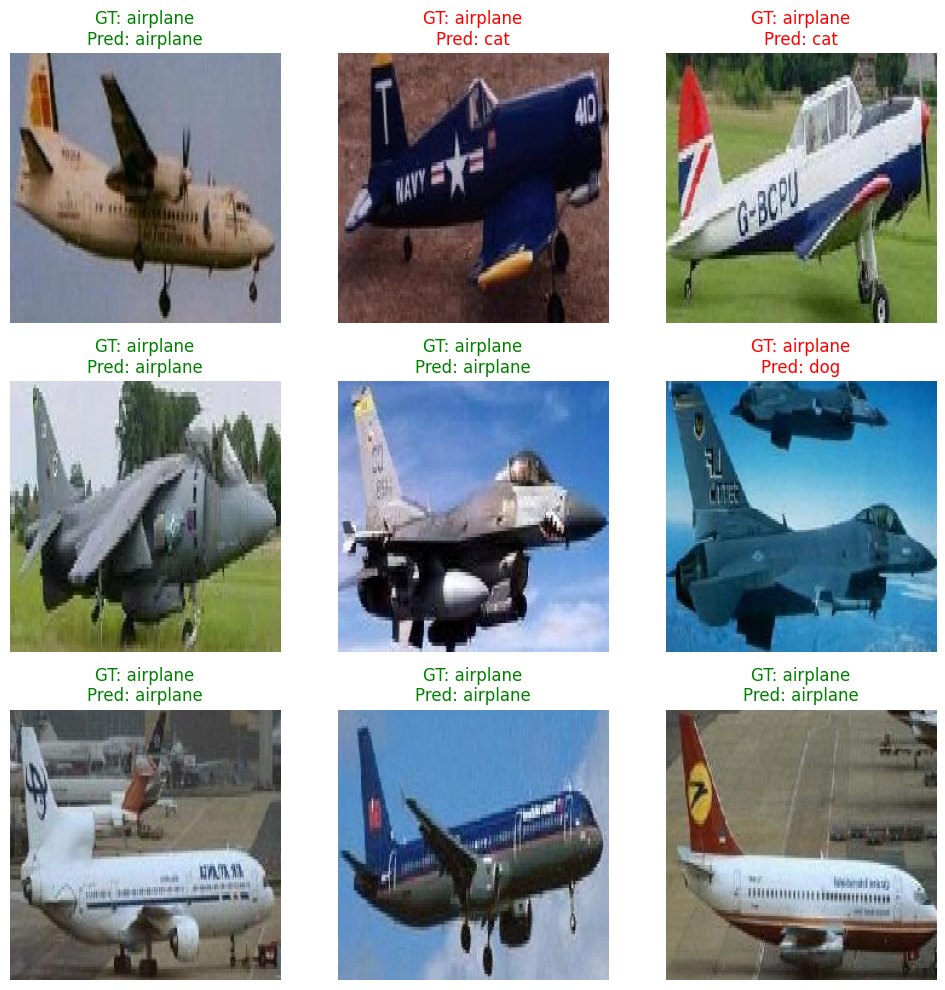

In [37]:
# Lấy một batch ảnh từ tập test
test_images, test_labels = next(test_generator)

# Dự đoán nhãn
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

# Lấy danh sách tên lớp
class_labels = train_generator.class_indices  # Từ điển {tên lớp: chỉ số}
class_labels = {v: k for k, v in class_labels.items()}  # Đảo lại {chỉ số: tên lớp}

# Hiển thị 9 ảnh đầu tiên trong batch
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()

for i in range(9):
    img = test_images[i]
    true_label = class_labels[true_classes[i]]
    pred_label = class_labels[predicted_classes[i]]
    
    axes[i].imshow(img)
    axes[i].set_title(f"GT: {true_label}\nPred: {pred_label}", color="green" if true_label == pred_label else "red")
    axes[i].axis("off")

plt.tight_layout()
plt.show()
